# Homework "Linear algebra. Matrices".

In [31]:
import random

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

# Task 1:

Given an 2 dimensional object:



```
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```

Using linear maps:\
● Reduce object x2\
● Turn on 130 degrees\
● Mirror object with respect to y=x\
● Calculate Jacobian determinant\

In [2]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)

In [3]:
A.shape

(6, 3)

We can notice that for plotting our object third dimension not required. While input matrix has it.


In [4]:
def plotter(function):
    def wrapper(input_matrix, transform_argument=None):
        if transform_argument is None: transform_matrix = function(input_matrix) 
        else: transform_matrix = function(input_matrix, transform_argument)
        x = transform_matrix[:,0]
        y = transform_matrix[:,1]
        
        plt.plot(x, y)
        plt.ylim([-transform_matrix.max()*2, transform_matrix.max()*2])
        plt.xlim([-transform_matrix.max()*2, transform_matrix.max()*2])

    return wrapper

In [5]:
A = np.array([A[:,0],A[:,1]]).T

In [6]:
# Input object
@plotter
def original_mat(mat):
    return np.array([mat[:,0],mat[:,1]]).T

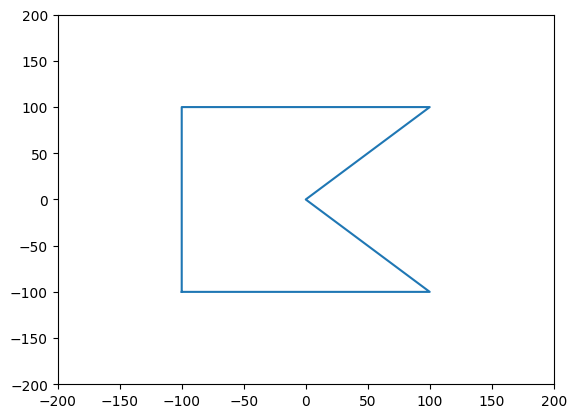

In [7]:
original_mat(A)

In [8]:
# Reduce object x2
@plotter
def resize(mat, resize_value):
    transformed = np.eye(mat.shape[1],mat.shape[1]) * resize_value
    return mat @ transformed

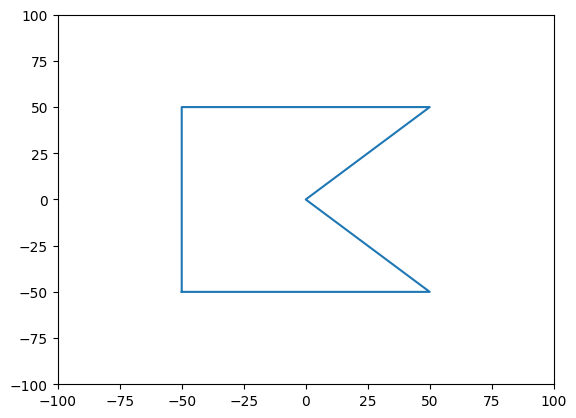

In [9]:
resize(A, 0.5)

In [10]:
# Rotate on 130 degrees
@plotter
def rotate(mat, degree):
    turn_mat = np.array([[np.cos(degree), -np.sin(degree)], 
                         [np.sin(degree), np.cos(degree)]])
    return mat @ turn_mat

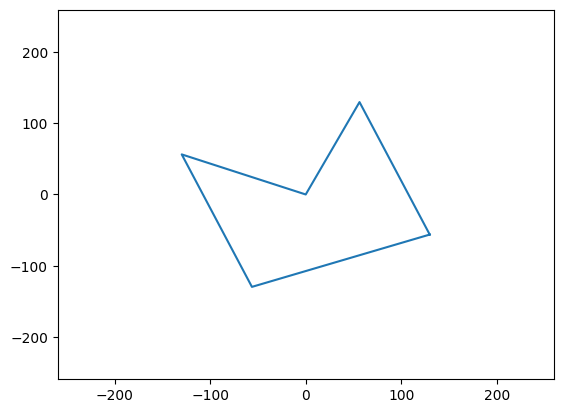

In [11]:
rotate(A, 130)

In [14]:
# Mirror object with respect to y=x

@plotter
def mirror(mat):
    transform_matrix = np.array([[0, 1],  
                                 [1, 0]])
    return mat @ transform_matrix

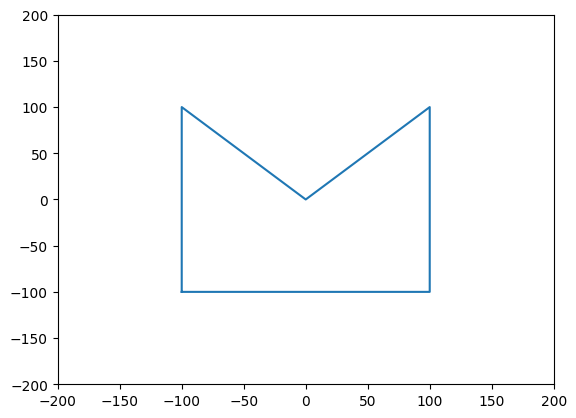

In [15]:
mirror(A)

In [16]:
# Calculate Jacobian determinant of the last matrix

resized = A @ (np.eye(A.shape[1],A.shape[1]) * .5)
resized_turned = resized @ (np.array([[np.cos(130), -np.sin(130)], 
                                      [np.sin(130), np.cos(130)]]))
transformed = resized_turned @ np.array([[0, 1], 
                                         [1, 0]])

trans_mat = (np.eye(A.shape[1],A.shape[1]) * .5) \
          @ (np.array([[np.cos(130), -np.sin(130)],
                       [np.sin(130), np.cos(130)]]))\
          @  np.array([[0, 1], 
                       [1, 0]])
    
assert np.all(transformed == A @ trans_mat)

(-129.73972806414585, 129.73972806414585)

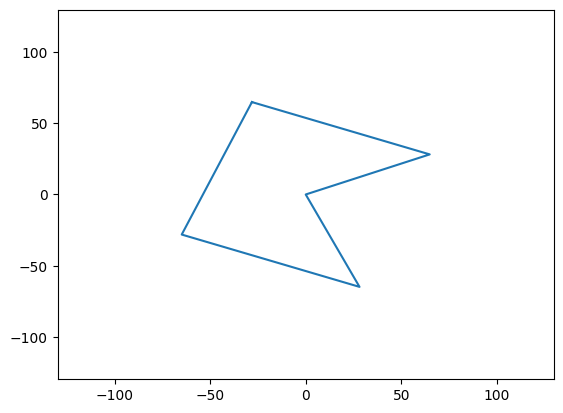

In [17]:
x = transformed[:,0]
y = transformed[:,1]

plt.plot(x, y)
plt.ylim([-transformed.max()*2, transformed.max()*2])
plt.xlim([-transformed.max()*2, transformed.max()*2])

In [18]:
print("Jacobian determinant =", np.linalg.det(trans_mat))

Jacobian determinant = -0.25


# Task №2

Calculate system of equations using matrices

x + z = 2\
-x + y - 2z + w = -2\
4x + z - 2w = 0\
-4x + 4*y + w = 5


In [21]:
# coefficient matrix
A = np.array([[1,0,1,0], 
                    [-1,1,-2,1],
                    [4,0,1,-2],
                    [-4,4,0,1]])
# first vector
b = np.array([2,-2,0,5])

$A x=y \quad \Rightarrow \quad A^{-1} A x=A^{-1} y \quad \Leftrightarrow \quad x=A^{-1} y$

In [22]:
A1 = np.linalg.inv(A)

In [38]:
x = A1 @ b
print(f"x = {x[0]}\ny = {x[1]}\nz = {x[2]}\nw = {x[3]}")

x = 0.0
y = 1.0
z = 2.0
w = 1.0
x = 0.0
y = 1.0
z = 2.0
w = 1.0


# Differentiation

In [23]:
A1 = np.array([[1,2,3], [4,5,6], [7,8,9]])
A2 = np.random.random((3,3))
A2

array([[0.61604503, 0.12712888, 0.09685409],
       [0.4115526 , 0.30442192, 0.67055682],
       [0.11659279, 0.29639908, 0.02789909]])

In [40]:
# differentiating the function x**2+1
x = sp.symbols('x')
f = x**2+1

In [42]:
f_prime = sp.diff(f, x)

# Manual composition of rotation and shear calculation

In [120]:
M_rotation = np.array([[np.cos(130), -np.sin(130)],
                       [np.sin(130), np.cos(130)]])
M_shear = np.array([[1,1],
                    [0,1]])

In [129]:
composition = M_shear@M_rotation

In [130]:
manual_composition = np.array([[M_shear[0][0] * M_rotation[:,0][0] + M_shear[0][1] * M_rotation[:,0][1],
                        M_shear[0][0] * M_rotation[:,1][0] + M_shear[0][1] * M_rotation[:,1][1]],
                       [M_shear[1][0] * M_rotation[:,0][0] + M_shear[1][1] * M_rotation[:,0][1],
                        M_shear[1][0] * M_rotation[:,1][0] + M_shear[1][1] * M_rotation[:,1][1],
                        ]])


In [134]:
np.all(composition == manual_composition)

True

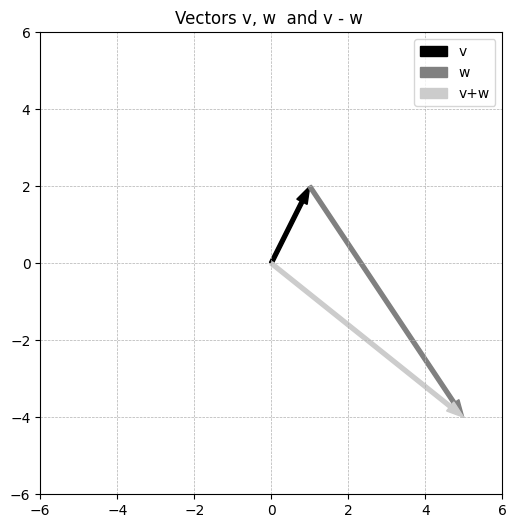

In [138]:
# The vectors
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(v[0],v[1],w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(0,0,vPlusW[0],vPlusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors v, w  and v - w ')
plt.savefig('Figure_02_02a.png',dpi=300) # write out the fig to a file
plt.show()

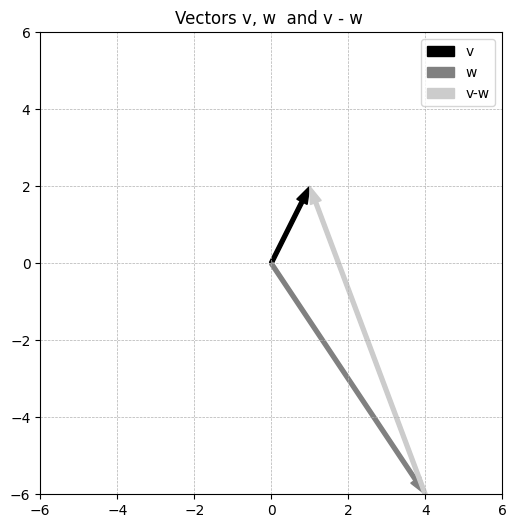

In [139]:
# vector difference
vMinusW = v-w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(0,0,w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(w[0],w[1],vMinusW[0],vMinusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v-w'])
plt.title('Vectors v, w  and v - w ')
plt.savefig('Figure_02_02b.png',dpi=300)
plt.show()

In [140]:
# define function
def createUnitVector(v):
  # get vector norm
  mu = np.linalg.norm(v)
  # return unit vector
  return v / mu


# test on a unit vector
w = np.array([0,1,0])
print( createUnitVector(w) )

# test on a non-unit vector that is easy to confirm
w = np.array([0,3,0])
print( createUnitVector(w) )

# test on a non-unit vector
w = np.array([13,-5,7])
uw = createUnitVector(w)
print( uw ), print(' ')
# confirm the vectors' norms
print( np.linalg.norm(w),np.linalg.norm(uw) )

# what happens with the zeros vector?
print('\n\n\n') # just some spaces
createUnitVector( np.zeros((4,1)) )


[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]
 
15.588457268119896 0.9999999999999999






/var/folders/8m/pdb3kxls26vfh6fx96vt11380000gp/T/ipykernel_61477/205223015.py:6: RuntimeWarning: invalid value encountered in divide
  return v / mu


array([[nan],
       [nan],
       [nan],
       [nan]])

In [141]:
# the row vector to transpose
v = np.array([[1,2,3]])

# initialize the column vector
vt = np.zeros((3,1))

# direct implementation of the formula using a for loop
for i in range(v.shape[1]):
  vt[i,0] = v[0,i]

# confirm!
print(v), print(' ')
print(vt)

# Note about data types: The two vectors actually have different data types
#  (ints vs. floats). That happened because I defined v using ints while the default type
#  for np.zeros is float. You can match data types in several ways, including:
#  (1) write 3. instead of 3 when creating v; (2) use dtype=np.float as an optional input.



[[1 2 3]]
 
[[1.]
 [2.]
 [3.]]


In [143]:
# dimensionality
n = 11

# some random column vectors
a = np.random.randn(n,1)
b = np.random.randn(n,1)

# dot products both ways
atb = np.sum(a*b)
bta = np.sum(b*a)

# they're equal if their difference is 0
atb - bta

# For an extra challenge, see what happens when you use np.dot() to compute the dot products.


0.0

In [160]:
a = np.random.randn(8,8)
b = np.random.randn(3,1)
c = a* b
c.shape

(3, 3)

In [166]:
pic = np.random.randn(8,8)
pic.reshape(1,64)

array([[-2.81590727, -0.31851128, -0.13756372, -0.02483205,  0.18068675,
         0.37705925, -0.63360764,  0.70264077, -0.95292456,  0.18599316,
         0.41634042, -0.52314423,  1.23543971,  0.08652264, -0.89660634,
        -1.30432024,  0.70889138, -1.11163926, -0.54675519,  2.77766372,
         1.07989272,  0.47738604,  0.35604734,  0.85798099, -1.52286272,
         1.2346124 , -0.75741021, -1.3094951 ,  1.20794502, -1.37876794,
         0.17999753, -0.34210455, -1.55197189,  1.09167795, -1.82555339,
        -0.27464326, -0.23311817, -0.34711418, -0.32471772, -0.97462125,
        -0.45458025, -1.55453023, -1.02600458, -0.10182212, -0.80992563,
        -0.21954934, -0.01947592, -1.41744209, -1.14084666,  0.4977894 ,
        -0.59529347,  0.46990532, -0.31790026, -0.3851985 ,  0.92749641,
         1.222239  , -1.79371818,  0.66656241, -1.20908342, -0.71794871,
         1.31850831, -0.66401859,  1.14353119, -0.17464565]])

In [159]:
x = np.array([[2,1],[1,3]])
x@x

array([[ 5,  5],
       [ 5, 10]])

In [158]:
x[0]

array([-0.3132278 , -0.86236344, -0.91668395, -0.51222353, -0.21396297,
        0.55774212,  1.34748802, -1.8685755 , -1.23344944,  0.17498127,
        0.83247794,  0.64083456, -0.69975599, -0.07246059,  3.42235668,
        1.40203148, -0.66692269,  0.5389444 ,  0.03456012, -0.15199459,
        0.02270942,  0.23465787, -0.20738922,  0.5147824 , -0.73743092,
       -0.69364027, -0.63555826, -0.11048384, -1.44049848,  0.56207034,
       -0.79809135, -0.73599531, -0.30212716,  1.99788614, -1.34329975,
       -1.76824808,  0.8035722 , -0.30470166,  0.28813698,  0.76594034,
       -0.34808173, -0.36710077,  0.97848225, -0.55689112, -1.19632027,
       -0.62130602, -0.40430607,  0.62075501, -1.64358358, -0.35636862,
       -1.91886786,  0.39045561,  1.17947234, -0.07200518, -0.44519419,
       -0.32768486,  0.17241365, -0.82079685, -0.65161543, -0.56704041,
        0.4971268 , -2.759362  ,  1.52777335,  1.85282097])

In [150]:
x.reshape(2,2,2)

array([[[ 0.4015407 , -1.97972227],
        [-2.21864753, -1.00207431]],

       [[-1.52760677,  2.05010399],
        [ 0.48422499,  0.80156112]]])